# Исследование объявлений о продаже квартир

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [2254]:
#импортируем нужные нам библиотеки и расширим диапазон просматриваемых столбцов
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2255]:
pd.set_option('display.max_columns', 30)
estate_ad_archive = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#Вызовем методы .head и .info для оценки структуры и объема данных
 
display(estate_ad_archive.head())
print()
print(estate_ad_archive.info())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around30

### Вывод

При первом знакомстве с данными мы выделили следующие особенности:
1) во многих столбцах есть пропуски данных. Много пропусков в картографических данных (расстояния до центра, аэропорта, водоема и т.д.). Видимо не получилось их распознать. В анкетных данных тоже есть пропуски. Предположим, что большая их часть - случайная. Возможно, какие-то вопросы анкеты владельцы анкеты не заполнили, например, не помнили высоту потолков или на заполнили данные, является ли объект апартаментами. Какие-то пропуски логические, например, наличие кухонной зоны в квартирах студиях и квартирах свободной планировки. 
2) в некоторых столбцах неверно указан тип данных: в столбце 'first_day_exposition' с датой и временем, в нескольких столбцах вещественное число необходимо заменить на целочисленное
3) В названии столбца total images мы видим запятую, а в столбце cityCenters_nearest - большая буква

### Шаг 2. Предобработка данных

In [2256]:
#Приведем названия столбцов к единообразию
estate_ad_archive.rename(columns={',total_images': 'total_images', 'cityCenters_nearest': 'citycenters_nearest'}, inplace=True)
print(estate_ad_archive.columns)


Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


In [2257]:
#выведем описательные характеристики нашей выборки
estate_ad_archive.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### 2. 1. Обработка пропусков

In [2258]:
# посмотрим, в каких столбцах сколько пропусков
print(estate_ad_archive.isnull().sum())
print()
#Далее поочередно обработаем каждый столбец

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
citycenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64



### 2.1.1: Высота потолков

In [2259]:
# помимо пропущенных значений, мы обнаружили аномально высокие потолки и 
#аномально низкие потолки. Посчитаем их:
print(estate_ad_archive.loc[estate_ad_archive['ceiling_height'] < 2.3]['ceiling_height'].count())
print(estate_ad_archive.loc[estate_ad_archive['ceiling_height'] > 5.0]['ceiling_height'].count())



16
36


оставим все пропущенные значения как есть. Их доля участия 39%, заменять на некие расчетные значения, значит - искажать результат. 
Тип этих данных - вещественное число, их можно использовать в расчетах. 

In [2260]:
print(estate_ad_archive['ceiling_height'].isnull().sum())
  

9195


### 2.1.2. Количество этажей в доме

In [2261]:
#проанализируем столбец с общим количеством этажей в доме. 
#Отсутствующих значений - немного.
#Посмотрим, на каких этажах предлагают квартиры в этих домах с неизвестным количеством этажей.
estate_ad_archive.query('floors_total.isnull()')['floor'].value_counts()

4     10
6      9
8      8
12     6
9      5
3      4
21     4
5      4
7      4
11     3
10     3
1      3
13     3
15     3
18     3
19     3
14     2
20     2
2      2
24     2
23     1
17     1
22     1
Name: floor, dtype: int64

Этажность дома нам интересна при анализе стоимости квартир, поскольку квартиры на последних
этажах элитных домов стоят обычно дороже. В домах старого фонда и дешевых новостройках наоборот - 
стоимость квартир на последних этажах дешевле из-за частых проблем с кровлей, водоснабжением, 
нерабочими лифтами и т.д. Если данных нет - предположим, продавец их не заполнил. Примем, что это квартиры не на последнем этаже. Мы их оставим как есть, а в дальнейших расчетах определим их в категорию этажей "Другой"

### 2.1.3. Категория 'Апартаменты'

Столбец is_apartment В этом столбце в большей части строк значения пропущены.В России апартаменты — это "нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания. Апартаменты продаются в административных зданиях, а также в зданиях, имеющих статус гостиницы". Можно предположить, что в нашем архиве объявлений таких объектов немного и все они отмечены продавцами как апартаменты.

In [2262]:
#определим количество апартаментов методом.value_counts(). 
print(estate_ad_archive['is_apartment'].value_counts())
print(estate_ad_archive['is_apartment'].unique())

False    2725
True       50
Name: is_apartment, dtype: int64
[nan False True]


Примем, что значение в данном столбце отсутствует, потому что этот объект - не апартаменты, иначе
продавец бы заполнил эти данные, поскольку это особый вид недвижимости с рядом правовых ограничений

In [2263]:
#Пропуски мы  заполним False
estate_ad_archive['is_apartment'] = estate_ad_archive['is_apartment'].fillna(value = False)
print(estate_ad_archive['is_apartment'].value_counts())

False    23649
True        50
Name: is_apartment, dtype: int64


### 2.1.4. Балкон

In [2264]:
#Почти в половине все строк данного столбца отсутствуют значения, плюс мы видим в ряде строк
#число балконов 3, 4, 5
print(estate_ad_archive['balcony'].value_counts())
print(estate_ad_archive['balcony'].unique())


1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64
[nan  2.  0.  1.  5.  4.  3.]


In [2265]:
#сделаем срез и посмотрим, что это за объекты с количеством балконов 5, например
display(estate_ad_archive.query('balcony==5').head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,NaN,14.0,59.0,8,False,False,False,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
42,13,22000000.0,161.8,2015-07-08T00:00:00,4,2.80,4.0,80.9,2,False,False,False,17.6,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
116,18,10999000.0,97.2,2017-11-13T00:00:00,3,2.50,16.0,NaN,16,False,False,False,18.3,5.0,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0
267,2,14700000.0,120.0,2018-09-07T00:00:00,3,2.75,20.0,63.0,18,False,False,False,16.0,5.0,Санкт-Петербург,39204.0,10430.0,2.0,627.0,3.0,77.0,61.0
311,20,12500000.0,86.0,2018-10-19T00:00:00,3,2.80,25.0,47.0,3,False,False,False,13.0,5.0,Санкт-Петербург,52192.0,15686.0,0.0,NaN,1.0,441.0,NaN


По логике, ни в одной 2 комнатной квартире площадью 65 метров не может быть 5 балконов по определению.Соответственно, задаем уточняющий вопрос к источнику данных, что за единицы измерения в этом столбце: число балконов, как нам было объявлено, метраж (что маловероятно, потому что максимальное число 5,а по факту может быть и 7 и 8 и больше)? А пока, мы в этом столбце заменим nan на нули. Балкон не входит в общую площадь квартиры, в расчетах данные этого столбца использовать не будем

In [2266]:
estate_ad_archive['balcony'] = estate_ad_archive['balcony'].fillna(0)
estate_ad_archive['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

### 2.1.5. Жилая площадь

У нас пропущены значения в  строках  8% выборки. Надо заполнять!

In [2267]:
#Добавим в нашу выборку столбец показывающий долю жилой площади в общей площади
estate_ad_archive['living_total_ratio'] = estate_ad_archive['living_area'] / estate_ad_archive['total_area']

In [2268]:
#проверим, нет ли нелогичных значений в новом столбце:
estate_ad_archive['living_total_ratio'].describe()
#видим, что есть некое максимальное значение, равное 1. Возможно, объект со свободной планировкой без
#разделения на зоны, проверим:
estate_ad_archive.query('living_total_ratio == 1')
#Да, действительно, данные объяснимы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_total_ratio
9861,10,2350000.0,25.0,2017-12-03T00:00:00,0,NaN,22.0,25.0,17,False,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,13.0,1.0
12691,1,3700000.0,24.2,2017-11-10T00:00:00,0,NaN,19.0,24.2,13,False,False,True,NaN,1.0,Санкт-Петербург,17837.0,16840.0,0.0,NaN,2.0,210.0,74.0,1.0


In [2269]:
#посмотрим соотношение квартир с разным количеством комнат в нашей выборке
print(estate_ad_archive['rooms'].value_counts())
print()


1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64



In [2270]:
#у нас есть квартиры с количеством комнат, равным 0. Посмотрим, что это за квартиры:
estate_ad_archive.query('rooms == 0').sort_values(by=['total_area'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_total_ratio
8886,10,2450000.0,15.5,2018-08-22T00:00:00,0,NaN,5.0,10.0,2,False,True,False,NaN,0.0,Санкт-Петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27.0,0.645161
9412,5,2100000.0,16.0,2017-12-10T00:00:00,0,NaN,6.0,13.0,1,False,False,True,NaN,0.0,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0,0.812500
716,5,1500000.0,17.0,2017-06-07T00:00:00,0,2.70,9.0,12.0,1,False,True,False,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0,0.705882
12996,8,1900000.0,18.0,2019-01-25T00:00:00,0,2.60,5.0,16.0,3,False,True,False,NaN,0.0,Санкт-Петербург,19573.0,15772.0,2.0,149.0,2.0,496.0,10.0,0.888889
8755,1,1350000.0,18.8,2017-11-22T00:00:00,0,2.75,19.0,15.8,1,False,True,False,NaN,0.0,Санкт-Петербург,37636.0,14479.0,0.0,NaN,1.0,1127.0,128.0,0.840426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13613,16,8100000.0,58.4,2019-04-26T00:00:00,0,3.30,7.0,33.0,6,False,True,False,NaN,0.0,Санкт-Петербург,14509.0,8288.0,0.0,NaN,0.0,NaN,NaN,0.565068
21227,0,8200000.0,71.0,2017-07-21T00:00:00,0,5.80,5.0,68.0,5,False,True,False,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0,0.957746
3458,6,7400000.0,73.6,2017-05-18T00:00:00,0,NaN,3.0,50.0,1,False,True,False,NaN,0.0,Санкт-Петербург,26581.0,6085.0,0.0,NaN,1.0,348.0,60.0,0.679348
20082,10,16300000.0,98.4,2017-11-08T00:00:00,0,3.10,5.0,60.5,2,False,True,False,NaN,0.0,Санкт-Петербург,26972.0,5819.0,0.0,NaN,1.0,674.0,537.0,0.614837


Мы видим, что владельцы объявлений к таким квартирам относят либо квартиры-студии, либо квартиры со
свободной планировкой. У них есть еще одна особенность - отсутствие кухонных зон, что мы учтем позже

In [2271]:
#сгруппируем объекты по числу комнат и найдем медиану соотношения жилой и общей площадей для каждой
#группы
try:
    living_total_ratio_median = estate_ad_archive.groupby('rooms').agg({'living_total_ratio': ['median']})
    print(living_total_ratio_median)
except:
    print('ошибка')

      living_total_ratio
                  median
rooms                   
0               0.689655
1               0.482488
2               0.585009
3               0.631667
4               0.659740
5               0.651842
6               0.679412
7               0.681670
8               0.688475
9               0.628251
10              0.653103
11              0.710093
12              0.455222
14              0.648695
15              0.693220
16              0.666667
19              0.706086


Замечаем, что медиана соотношения жилой и общей площадей последовательно увеличивается с ростом числа комнат до 8, потом это соотношение не имеет четкого тренда. Особняком стоят квартиры с количеством комнат 0. Это либо квартиры-студии,либо квартиры со свободной планировкой

In [2272]:
#заполним пропуски в жилой площади:

grp = estate_ad_archive.groupby(['rooms'])
estate_ad_archive['living_area'] = grp.living_total_ratio.apply(lambda x: x.fillna(x.median()*estate_ad_archive['total_area']))
print(estate_ad_archive['living_area'].isnull().sum())

0


### 2.1.6. Площадь кухни

У нас есть в выборке квартиры-студии и квартиры свободной планировки, особенность этого жилья - нет выделенной зоны кухни. Посмотрим, сколько у нас таких объектов

In [2273]:
estate_ad_archive.query('studio == True or open_plan == True').count()

total_images            216
last_price              216
total_area              216
first_day_exposition    216
rooms                   216
ceiling_height           92
floors_total            213
living_area             216
floor                   216
is_apartment            216
studio                  216
open_plan               216
kitchen_area              0
balcony                 216
locality_name           216
airports_nearest        129
citycenters_nearest     129
parks_around3000        129
parks_nearest            32
ponds_around3000        129
ponds_nearest            75
days_exposition         202
living_total_ratio      201
dtype: int64

In [2274]:
# теперь посмотрим, сколько у нас студий и квартир с открытой планировкой и пропусками кухонных зон: 
print (len(estate_ad_archive.query('studio == True or open_plan == True and kitchen_area.isnull()')))
 

216


In [2275]:
#Наше предположение верно и пропуски кухонных площадей в строках со студиями мы заменим на нули:
estate_ad_archive.loc[estate_ad_archive['studio'] == True, 'kitchen_area'] = 0
print (len(estate_ad_archive.query('studio == True and kitchen_area.isnull()')))

0


In [2276]:
# и в строках с открытыми планировками сделаем тоже самое
estate_ad_archive.loc[estate_ad_archive['open_plan'] == True, 'kitchen_area'] = 0
#Посмотрим, что получилось
print (len(estate_ad_archive.query('open_plan == True and kitchen_area.isnull()')))

0


In [2277]:
#добавим в нашу выборку столбец с соотношением площади кухонной зоны к общей площади квартиры
estate_ad_archive['kitchen_total_ratio'] = estate_ad_archive['kitchen_area'] / estate_ad_archive['total_area']
#проверим, нет ли нелогичных значений в новом столбце:
estate_ad_archive['kitchen_total_ratio'].describe()


count    21637.000000
mean         0.185484
std          0.074954
min          0.000000
25%          0.132558
50%          0.171429
75%          0.230916
max          0.787879
Name: kitchen_total_ratio, dtype: float64

In [2278]:
#сгруппируем объекты по числу комнат и найдем медиану соотношения кухонной и общей площадей 
#для каждой группы
try:
    kitch_total_ratio_median = estate_ad_archive.groupby('rooms').agg({'kitchen_total_ratio': ['median']})
    print(kitch_total_ratio_median)
except:
    print('ошибка')


      kitchen_total_ratio
                   median
rooms                    
0                0.000000
1                0.247678
2                0.161074
3                0.128553
4                0.112245
5                0.105325
6                0.099502
7                0.083717
8                0.109170
9                0.049620
10               0.091624
11               0.066855
12               0.124444
14               0.075636
15               0.169492
16               0.048148
19               0.073679


In [2279]:
#заполним пропуски в остальных строках столбца kitchen_area:

grp = estate_ad_archive.groupby(['rooms'])
estate_ad_archive['kitchen_area'] = grp.kitchen_total_ratio.apply(lambda x: x.fillna(x.median()*estate_ad_archive['total_area']))
print(estate_ad_archive['kitchen_area'].isnull().sum())

0


### Населенный пункт

Locality_name: пропусков немного, мы их просто удалим, потому что месторасположение квартиры существенно влияет на ее стоимость. Выяснять, по другим признакам, где бы эта квартира могла находиться - трудоемко, наблюдаемое количество пропусков не стоят трудозатрат.

In [2280]:
estate_ad_archive = estate_ad_archive.dropna(subset = ['locality_name']).reset_index(drop=True)
estate_ad_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 24 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23565 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
citycenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around3000

In [2281]:
#приведем к нижнему регистру названия населенных пунктов для удобства дальнейших исследований:
estate_ad_archive['locality_name'] = estate_ad_archive['locality_name'].str.lower()
estate_ad_archive['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

Расстояние до ближайшего аэропорта airports_nearest. Пропуски не будем заполнять. Эти данные в большинстве случаев не учитываются при принятии решения о покупке квартиры.

Citycenters_nearest:данные нужны для квартир в Санкт-Петербурге. Пропуски оставим их как есть

In [2282]:
#Посмотрим, сколько сколько строк без этого параметра.
print(len(estate_ad_archive.query('locality_name in "санкт-петербург" and citycenters_nearest.isnull()')))

61


Пропуски в столбцах parks_around3000, parks_nearest, ponds_around3000, ponds_nearest оставим как есть: приятно жить рядом с парком и водоемом, но на стоимость квартир это влияет незначительно, и мы 
попробуем это доказать на тех объектах, где значения в этих столбцах присутствуют.

In [2283]:
#пропуски в столбце days_exposition:пропуски могут быть случайные, а может быть в момент
#выгрузки выборки объявление висело в продаже. Мы этого не знаем, поэтому просто оставим пропуски
 
print(estate_ad_archive['days_exposition'].isnull().sum())

3180


### Изменение типов данных

In [2284]:
#Посмотрим еще раз на типы данных и преобразуем некоторые из них:
estate_ad_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 24 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23565 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
citycenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around3000

Что мы видим: в столбце first_day_exposition должен быть тип datetime, last_price - int, balcony - должен быть тип int, в остальном, все выглядит в норме:тип float у нас будет там, где есть вещественное число либо пропуск. В строках с пропусками тип данных мы не заменим на int, даже если того требует целочисленое число

In [2285]:
#осуществим задуманное
estate_ad_archive['balcony'] = estate_ad_archive['balcony'].astype('int')
estate_ad_archive['last_price'] = estate_ad_archive['last_price'].astype('int')
estate_ad_archive['first_day_exposition']= pd.to_datetime(estate_ad_archive['first_day_exposition'],
                                                          format = '%Y.%m.%dT%H:%M:%S')
#Проверим преобразования: все получилось
print(estate_ad_archive.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 24 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23565 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
citycenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around

In [2286]:
#Проверим всю таблицу на дубликаты:
print(estate_ad_archive.duplicated().sum())


0


#### ВЫВОДЫ Наша выборка -  база объявлений по СПБ и Ленобласти - достаточно разнородная с большим количеством параметров квартир. Ключевые параметры присутствуют в полном объеме. Тем не менее, в выборке много пропусков. Те из них, которые влияют на исследуемые зависимости мы постарались заполнить объективно верными и логичными значениями (площадь кухни, площадь жилых помещений, категория апартаменты) либо оставить как есть, чтобы не вносить в выборку искусственные значения на основе субъективных домыслов. Неправдоподобные значения высоты потолков мы перевели в пропуски, чтобы не искажать данные. В нескольких столбцах мы заменили неверно указанный тип данных. Дубликатов не обнаружили. 

### Шаг 3. Посчитайте и добавьте в таблицу

In [2287]:
#Добавим в таблицу столбец с ценой квадратного метра
estate_ad_archive['price_per_meter'] = estate_ad_archive['last_price']/estate_ad_archive['total_area']
#переведем в тип данных int
estate_ad_archive['price_per_meter'] = estate_ad_archive['price_per_meter'].round()
estate_ad_archive.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_total_ratio,kitchen_total_ratio,price_per_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,0.472222,8,False,False,False,0.231481,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,0.231481,120370.0
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,0.460396,1,False,False,False,0.272277,2,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,0.272277,82921.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,0.612500,4,False,False,False,0.148214,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214,92786.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,100.435000,9,False,False,False,20.439938,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN,408176.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,0.320000,13,False,False,False,0.410000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000,100000.0


In [2288]:
#добавим в табицу день недели, месяц и год публикации объявления
estate_ad_archive['weekday_exposition'] = estate_ad_archive['first_day_exposition'].dt.weekday
estate_ad_archive['month_exposition'] = estate_ad_archive['first_day_exposition'].dt.month
estate_ad_archive['year_exposition'] = estate_ad_archive['first_day_exposition'].dt.year
estate_ad_archive.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_total_ratio,kitchen_total_ratio,price_per_meter,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,0.472222,8,False,False,False,0.231481,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,0.231481,120370.0,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,0.460396,1,False,False,False,0.272277,2,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,0.272277,82921.0,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,0.612500,4,False,False,False,0.148214,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214,92786.0,3,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,100.435000,9,False,False,False,20.439938,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN,408176.0,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,0.320000,13,False,False,False,0.410000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000,100000.0,1,6,2018


In [2289]:
#добавим в таблицу этаж квартиры; варианты — первый, последний, другой.
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
estate_ad_archive['floor_category'] = estate_ad_archive.apply(floor_category, axis=1)
#проверим
estate_ad_archive.query('floor_category == "последний"').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_total_ratio,kitchen_total_ratio,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_category
12,10,3890000,54.0,2016-06-30,2,NaN,5.0,0.555556,5,False,False,False,0.166667,0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,0.555556,0.166667,72037.0,3,6,2016,последний
13,20,3550000,42.8,2017-07-01,2,2.56,5.0,0.630841,5,False,False,False,0.121495,1,петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,0.630841,0.121495,82944.0,5,7,2017,последний
23,11,2950000,32.0,2016-10-29,1,2.60,9.0,0.553125,9,False,False,False,0.190625,0,санкт-петербург,15414.0,14211.0,2.0,517.0,1.0,190.0,615.0,0.553125,0.190625,92188.0,5,10,2016,последний
36,13,3790000,45.0,2017-01-25,2,NaN,9.0,0.600000,9,False,False,False,0.140000,2,санкт-петербург,49574.0,16461.0,1.0,459.0,0.0,NaN,139.0,0.600000,0.140000,84222.0,2,1,2017,последний
43,13,9330000,48.0,2017-01-10,2,3.00,4.0,0.583333,4,False,False,False,0.156250,0,санкт-петербург,15016.0,10822.0,0.0,NaN,1.0,492.0,763.0,0.583333,0.156250,194375.0,1,1,2017,последний


Соотношение жилой и общей площади, а также отношение площади кухни к общей мы уже добавили

## Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Изучение параметров выборки

In [2290]:
#Создадим функцию для построения гистограммы и ограничим хвосты диапазоном от Q1-3*IQR до Q3+3*IQR


def histogram(value, x_label = "", y_label = "", title = ""):
    q75, q25 = np.percentile(value, [75 ,25])
    iqr = q75 - q25
    _, ax = plt.subplots()
    ax.hist(value, bins = 50, range = (q25-3*iqr, q75+3*iqr))
    ax.grid()
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

### Общая площадь квартир

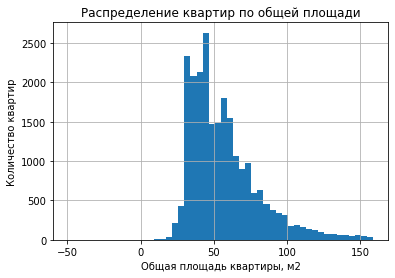

In [2291]:
#построим гистограмму распределения значений по условиям из функции выше
histogram(estate_ad_archive['total_area'], x_label="Общая площадь квартиры, м2", y_label="Количество квартир", title="Распределение квартир по общей площади")

#### Для общей площади жилья характерно распределение Пуассона: левая часть гистограммы резко обрывается, в то время как правый ус достаточно длинный.  Площадь большей части объектов, выставленных на продажу находится в диапазоне от 30 до 60 квадратных метров. Квартир площадью менее 30 кв.метров очень немного, в то время как квартиры с метражом более 60 метров представлены достаточно широко

### Цена квартир

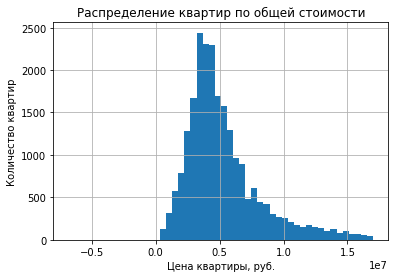

In [2292]:
#посмотрим гистограмму распределения значений 
histogram(estate_ad_archive['last_price'], x_label="Цена квартиры, руб.", y_label="Количество квартир", title="Распределение квартир по общей стоимости")
#мы видим длинный хвост справа. 

#### Диапазон цен на недвижимость напоминает нормальное распределение. Большая часть объявлений находится в ценовом диапазоне от 3 до 6 млн. рублей. 

### Число комнат

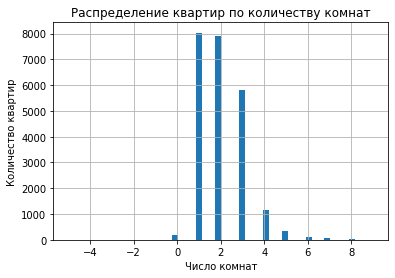

In [2293]:
#построим гистограмму распределения значений
histogram(estate_ad_archive['rooms'], x_label="Число комнат", y_label="Количество квартир", title="Распределение квартир по количеству комнат")

#### Большая часть выставленных на продажу объектов в исходной выборке - однушки, на втором месте с незначительным отставанием - двушки. Это объяснимо: такие объекты наиболее восстребованы из-за их ценовой доступности, особенно молодыми парами. Часто люди покупают такую недвижимость на стадии котлована с инвестиционной целью и по факту сдачи дома сразу же выставляют на продажу. 

### Высота потолков

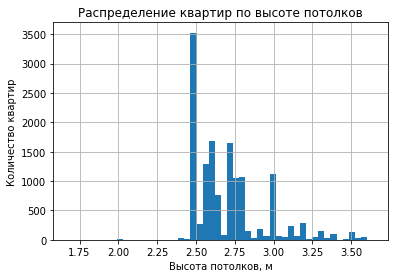

In [2294]:
#сделаем срез данных, где известна высота потолков
true_ceiling_height = estate_ad_archive.query('ceiling_height != "NaN"')
#построим гистограмму распределения высот по известным данным
histogram(true_ceiling_height['ceiling_height'], x_label="Высота потолков, м", y_label="Количество квартир", title="Распределение квартир по высоте потолков")

#### высота потолков колеблется в достаточно широком диапазоне, но в 99% всех квартир высота потолков от 2.5м до 3.7. Наблюдаем распределение Пуассона: по объективным причинам высоты потолков меньше 2м быть не может. В выборке встречаются объекты с очень высокими потолками. Мы считаем их выбросами и исключим из исследований

### Продолжительность продажи квартиры

In [2295]:
#Изучим, скольки времени продаются квартиры, от чего зависит время продажи. В работу берем столбец
estate_ad_archive['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Видим очень большой разброс значений. Медиана почти в два раза меньше среднего значения. Какие-то данные существенно влияют на наше распределение, необходимо их визуализировать

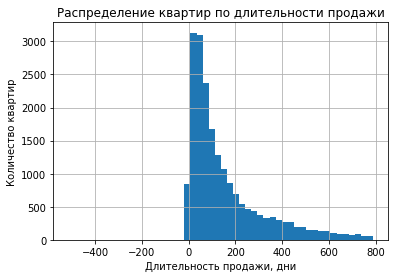

In [2296]:
#Построим гистограмму
true_days_exposition = estate_ad_archive.query('days_exposition != "NaN"')

histogram(true_days_exposition['days_exposition'], x_label="Длительность продажи, дни", y_label="Количество квартир", title="Распределение квартир по длительности продажи")

Мы видим очень длинный хвост, есть объекты, которые висят в объявлении очень долго. Или не продаются, или с какой-то другой целью весят

In [2297]:
#оценим, как кореллируют все наши данные друг с другом в матрице корелляции
print(estate_ad_archive.corr()['days_exposition'])
#коэффициенты корелляции со всеми параметрами - меньше 10%.

total_images          -0.027415
last_price             0.080937
total_area             0.149571
rooms                  0.126497
ceiling_height         0.019025
floors_total          -0.052410
living_area           -0.020208
floor                 -0.039501
is_apartment           0.015303
studio                -0.022447
open_plan             -0.024099
kitchen_area          -0.030132
balcony               -0.027430
airports_nearest      -0.017999
citycenters_nearest   -0.059481
parks_around3000       0.059652
parks_nearest          0.023674
ponds_around3000       0.072556
ponds_nearest         -0.078843
days_exposition        1.000000
living_total_ratio     0.012023
kitchen_total_ratio   -0.032219
price_per_meter        0.047710
weekday_exposition    -0.024614
month_exposition      -0.030021
year_exposition       -0.611616
Name: days_exposition, dtype: float64


#### В нашей выборке приемлемая длительность продажи составляет до 800 дней. Однако у нас есть около тысячи объектов, которы продаются подозрительно долго. Причем объективной зависимости от каких-то параметров квартиры мы не выявили. Эти объекты не выбиваются из общей выборки. Возможно, объявления забыли снять или есть некая сторонняя причина, почему они присутствуют 

## Удаление выбросов

In [2298]:
#Посмотрим еще раз на исходное описание исследуемых столбцов
estate_ad_archive[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23650.000000,2.365000e+04,23650.000000,14490.000000
mean,60.329069,6.541127e+06,2.070106,2.771287
std,35.661808,1.089640e+07,1.078620,1.261593
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.520000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.700000,6.799000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


(0, 150)

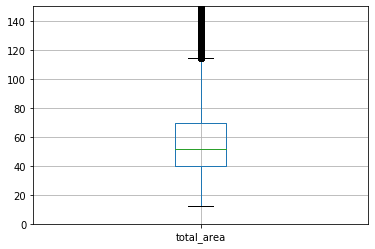

In [2299]:
#Построим диаграммы размаха для каждого исследуемого параметра:
estate_ad_archive[['total_area']].boxplot()
plt.ylim(0, 150)

(0, 12500000)

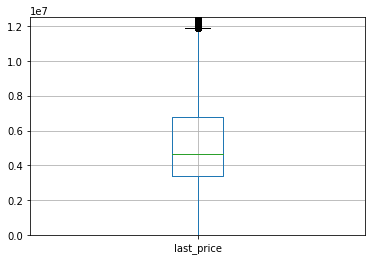

In [2300]:
estate_ad_archive[['last_price']].boxplot()
plt.ylim(0, 12500000)

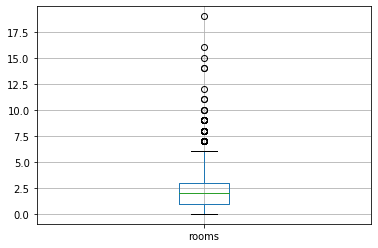

In [2301]:
estate_ad_archive[['rooms']].boxplot()

(2, 4)

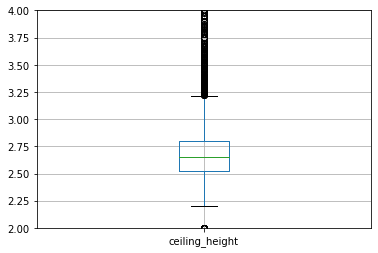

In [2302]:
estate_ad_archive[['ceiling_height']].boxplot()
plt.ylim(2, 4)


In [2303]:
#напишем функцию для удаления выбросов:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_in[col_name] = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)][col_name]
  


In [2304]:
remove_outlier(estate_ad_archive, 'total_area')

In [2305]:
remove_outlier(estate_ad_archive, 'last_price')

In [2306]:
remove_outlier(estate_ad_archive, 'rooms')

In [2307]:
remove_outlier(estate_ad_archive, 'ceiling_height')

In [2308]:
estate_ad_archive.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_total_ratio,kitchen_total_ratio,price_per_meter,weekday_exposition,month_exposition,year_exposition
count,23650.000000,2.159500e+04,22406.000000,23455.000000,13664.000000,23565.000000,23650.000000,23650.000000,23650.000000,23650.000000,18116.000000,18139.000000,18140.000000,8064.000000,18140.000000,9085.000000,20470.000000,21752.000000,21597.000000,2.365000e+04,23650.000000,23650.000000,23650.000000
mean,9.862326,4.838942e+06,54.325685,2.029631,2.679857,10.675875,3.517337,5.893277,1.009062,0.591712,28803.225878,14197.860742,0.611577,490.830729,0.769680,518.059879,180.753200,0.564750,0.185498,9.943225e+04,2.568710,6.401564,2017.370021
std,5.682278,2.217282e+06,19.349559,0.973653,0.184020,6.594823,13.207606,4.883317,2.990610,0.959662,12637.314144,8606.830295,0.802003,342.554386,0.937948,277.841733,219.777916,0.105385,0.074962,5.033793e+04,1.788808,3.491418,1.037806
min,0.000000,1.219000e+04,12.000000,0.000000,2.200000,1.000000,0.021583,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,0.021583,0.000000,1.120000e+02,0.000000,1.000000,2014.000000
25%,6.000000,3.300000e+06,39.400000,1.000000,2.500000,5.000000,0.500000,2.000000,0.135747,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000,0.495157,0.132653,7.661500e+04,1.000000,3.000000,2017.000000
50%,9.000000,4.400000e+06,50.100000,2.000000,2.640000,9.000000,0.580645,4.000000,0.180645,0.000000,26756.500000,13105.000000,0.000000,454.500000,1.000000,502.000000,95.000000,0.567860,0.171429,9.500000e+04,3.000000,6.000000,2017.000000
75%,14.000000,6.000000e+06,65.500000,3.000000,2.760000,16.000000,0.659524,8.000000,0.255556,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000,0.637778,0.230947,1.142740e+05,4.000000,10.000000,2018.000000
max,50.000000,1.189440e+07,114.200000,5.000000,3.210000,60.000000,430.133948,33.000000,122.377709,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.000000,0.787879,1.907500e+06,6.000000,12.000000,2019.000000


### Мы посчитали выбросами все значения параметров за пределамии межквартильного размаха умноженного на 1.5. В нашей итоговой выборке среднестатистическая квартира в продаже  - двушка площадью 50кв.м, с высотой потолков 2.64м, ценой порядка 4.4млн рублей. 

### Факторы, влияющие на стоимость квартиры

#### В расчетах этого раздела за стоимость квартиры мы будем принимать полную стоимость квартиры

In [2309]:
estate_ad_archive.corr()['last_price'].sort_values()

citycenters_nearest   -0.345444
kitchen_total_ratio   -0.091159
studio                -0.069612
ponds_nearest         -0.052433
open_plan             -0.047546
airports_nearest      -0.039194
weekday_exposition    -0.014317
kitchen_area          -0.008846
year_exposition       -0.001975
month_exposition       0.005493
is_apartment           0.022569
living_total_ratio     0.023090
parks_nearest          0.030061
living_area            0.050122
balcony                0.063979
days_exposition        0.084177
parks_around3000       0.118872
floor                  0.128461
ponds_around3000       0.146013
total_images           0.157482
floors_total           0.186922
ceiling_height         0.444256
rooms                  0.448927
price_per_meter        0.608575
total_area             0.693900
last_price             1.000000
Name: last_price, dtype: float64

Мы видим четкую прямую зависимость общей стоимости и стоимости метра, что понятно, и зависимость от общей площади. Прямая зависимость от остальных параметров присутствует в меньшей степени. Выберем параметры с максимальным коэф. корреляции и разберем характер зависимости от этих параметров: обшая площадь, высота потолков, количество комнат, удаленность от центра. Также по условию задания оценим зависимость стоимости от категории этажа и дате размещения объявления

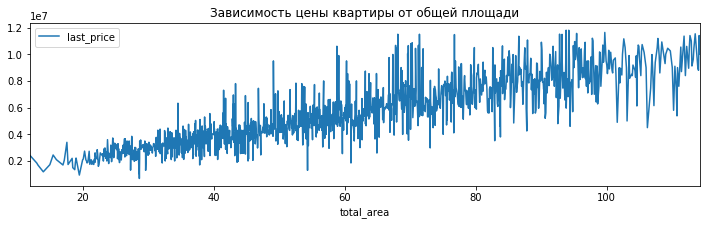

In [2310]:
#зависимость от общей площади
(estate_ad_archive
    .pivot_table(index = 'total_area', values = 'last_price', aggfunc = 'median')
    .plot(title = 'Зависимость цены квартиры от общей площади', figsize = (12, 3))
)

Зависимость от количества комнат:зависимость очевидна, чем больше количество комнат, тем больше площадь, тем больше общая стоимость жилья. Параметр rooms имеет более интересную связю с ценой метра и мы это можем посмотреть на графике

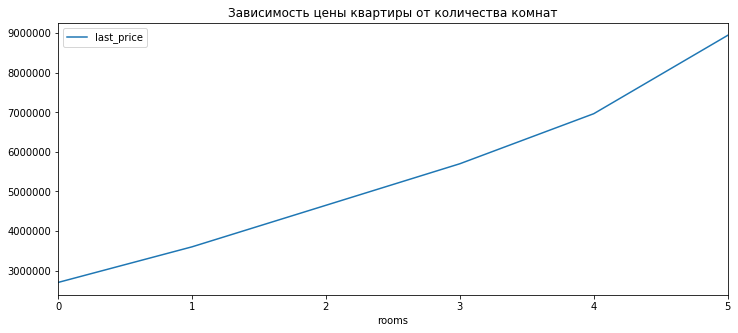

In [2311]:
(estate_ad_archive
    .pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')
    .plot(title = 'Зависимость цены квартиры от количества комнат', figsize = (12, 5))
)

Зависимость очевидна, чем больше количество комнат, тем больше площадь, тем больше общая стоимость жилья. Параметр rooms имеет более интересную связю с ценой метра и мы это можем посмотреть на втором графике

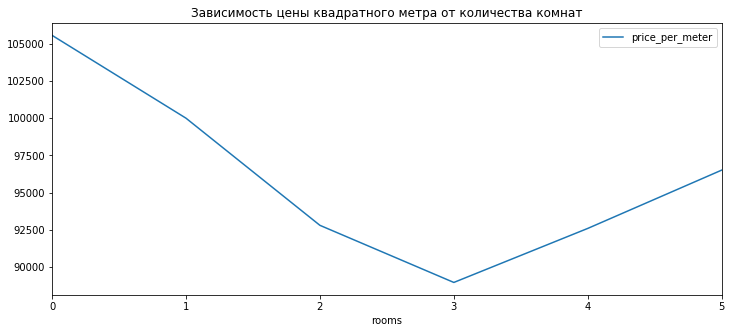

In [2312]:
(estate_ad_archive
    .pivot_table(index = 'rooms', values = 'price_per_meter', aggfunc = 'median')
    .plot(title = 'Зависимость цены квадратного метра от количества комнат', figsize = (12, 5))
)

Интересно, что стоимость метра в однушке самая высокая, а самые выгодные квартиры с точки зрения покупки - трешки. Цена метра самая низкая. 

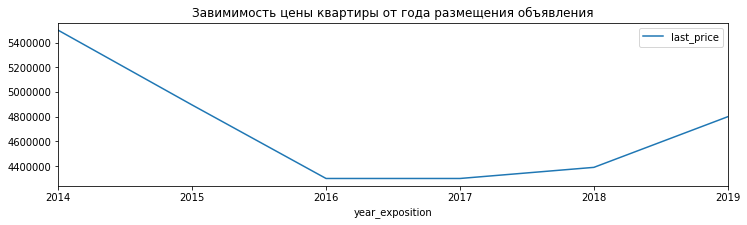

In [2313]:
#Зависимость от года размещения объявления
(estate_ad_archive
    .pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = 'median')
    .plot(title = 'Завимимость цены квартиры от года размещения объявления', figsize = (12, 3))
)


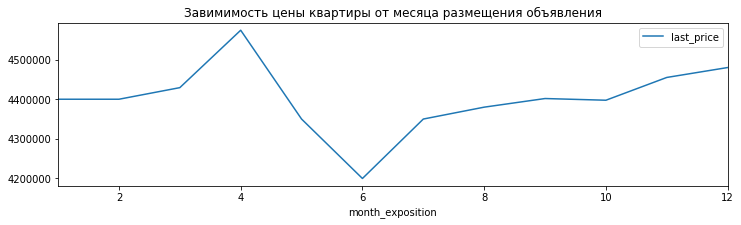

In [2314]:
#зависимость от месяца размещения публикации
(estate_ad_archive
    .pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = 'median')
    .plot(title = 'Завимимость цены квартиры от месяца размещения объявления', figsize = (12, 3))
)


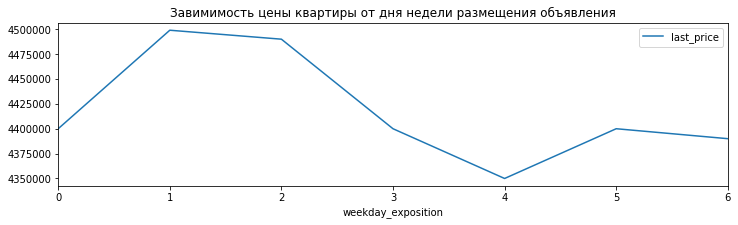

In [2315]:
#зависимость от месяца размещения публикации
(estate_ad_archive
    .pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = 'median')
    .plot(title = 'Завимимость цены квартиры от дня недели размещения объявления', figsize=(12, 3))
)

In [2316]:
#рассмотрим зависимость стоимости квартиры от категории этажа. 
estate_ad_archive.pivot_table(index = 'floor_category', columns='rooms', 
                              values = 'last_price', aggfunc=['median'])

median                                              \
rooms                 0.0        1.0        2.0        3.0        4.0   
floor_category                                                          
другой          2750000.0  3700000.0  5000000.0  5950000.0  7200000.0   
первый          2183000.0  3050000.0  3800000.0  4950000.0  5985000.0   
последний       3100000.0  3200000.0  4050000.0  5300000.0  6925000.0   

                           
rooms                 5.0  
floor_category             
другой          8950000.0  
первый          7875000.0  
последний       9500000.0

Ожидаемо квартиры на первых этажах - самые дешевые. На втором месте по возрастанию цены - квартиры на последних этажах. Это предсказуемо, о чем мы говорили выше. А вот в квартирах со свободной планировкой и студиях (количество комнат - 0) обстановка иная: квартиры на последних этажах - самые дорогие, ценятся как видовые.

### Вывод: с помощью матрицы корреляции мы выделили 4 параметра, с которыми прослеживается прямая или обратная зависимость у стоимости квартиры: общая площадь, высота потолков, количество комнат, удаленность от центра. Явно прямолинейно зависит стоимость квартиры от ее общей площади и количества комнат. В большинстве случаев увеличение количества комнат происходит на фоне увеличения площади. Поэтому, когда мы рассматриваем количество комнат, лучше обращаться к параметру "цена за квадратный метр". И тут мы наблюдаем интересную, знакомую из жизни картину: квадратный метр в однушке стоит существенно дороже, чем в двухкомнатной или трехкомнатной и т.д. квартире. Интересна зависимость стоимости недвижимости от даты размещения объявления: начиная с 2014 года недвижимость начала падать в цене, стагнация наблюдалась вплоть до 2019 года, когда начался постепенный рост. Причина такого тренда - кризис в экономике, падение реальных доходов населения, повышение ключевой ставки и увеличени ипотечных ставок. Если рассмотрим цену по месяцам в течение года, то картина также предсказуемая: с начала года и до апрелая идет постепенный рост предложений и цен на рынке. С апреля и до июня идет постепенное снижение цен: люди хотят поскорее избавиться от недвижимости к началу летних отпусков и уступают в цене. 

### Зависимость стоимости квартиры от населенного пункта

In [2317]:
#сделаем выборку 10  населенных пунктов с наибольшим числом объявлений
print(len(estate_ad_archive['locality_name'].unique()))
estate_ad_archive['locality_name'].value_counts().head(10)

364


санкт-петербург      15721
посёлок мурино         522
посёлок шушары         440
всеволожск             398
пушкин                 369
колпино                338
посёлок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

In [2318]:
#сделаем срез по ключевым 10 населенным пунктам и сохраним его в новую переменную
top_10localities = estate_ad_archive.query('locality_name in ("санкт-петербург", "посёлок мурино", "посёлок шушары", "всеволожск", "пушкин", "колпино", "посёлок парголово", "гатчина", "деревня кудрово", "выборг")')
top_10_describe = top_10localities.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['mean'])

print(len(top_10localities))
print(top_10_describe['mean']['price_per_meter'].sort_values(ascending=False))

18958
locality_name
санкт-петербург      114849.005788
пушкин               103125.818428
деревня кудрово       92473.588629
посёлок парголово     90175.886850
посёлок мурино        85752.181992
посёлок шушары        78677.379545
колпино               75424.571006
гатчина               68746.110749
всеволожск            68654.474874
выборг                58141.919831
Name: price_per_meter, dtype: float64


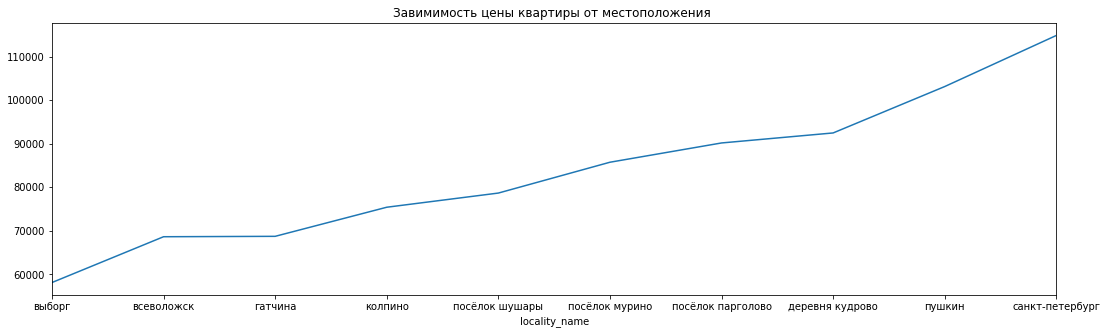

In [2319]:
top_10_describe['mean']['price_per_meter'].sort_values().plot(title = 'Завимимость цены квартиры от местоположения ', figsize=(18, 5))

### В нашей выборке топ 10 городов с наибольшим числом объявлений о продаже закономерно попал Санкт-Петербург и ближайшие пригороды. Стоимость жилья логично максимальная в Санкт-Петербурге и городе-спутнике Пушкин. Минимальная стоимость жилья в нашей выборке - в Выборге. Он находится в 150 км от Петербурга, но попал в наш топ10, как исторический город прилегающий к границе с Финляндией

### Изучим предложения квартир в Санкт-Петербурге

In [2320]:
##Добавим новый столбец с расстоянием до центра в километрах и округлим до целых значений

estate_ad_archive['citycenters_km'] = (estate_ad_archive['citycenters_nearest'] / 1000).round()
estate_ad_archive.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_total_ratio,kitchen_total_ratio,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_category,citycenters_km
0,20,NaN,108.0,2019-03-07,3.0,2.70,16.0,0.472222,8,False,False,False,0.231481,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,0.231481,120370.0,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1.0,NaN,11.0,0.460396,1,False,False,False,0.272277,2,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,0.272277,82921.0,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2.0,NaN,5.0,0.612500,4,False,False,False,0.148214,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214,92786.0,3,8,2015,другой,14.0
3,0,NaN,NaN,2015-07-24,3.0,NaN,14.0,100.435000,9,False,False,False,20.439938,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN,408176.0,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2.0,3.03,14.0,0.320000,13,False,False,False,0.410000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000,100000.0,1,6,2018,другой,8.0


In [2321]:
#Сделаем срез данных по Санкт_Петербургу
print(len(estate_ad_archive.query('locality_name in "санкт-петербург"')))
#выделим все объекты по СПБ, для которых известно расстояние до центра и сохраним срез в отдельной
#переменной
spb_properties = estate_ad_archive.query('locality_name in "санкт-петербург" and citycenters_nearest != "NaN"').copy()
print(len(spb_properties))
spb_properties.head()

15721
15660


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_total_ratio,kitchen_total_ratio,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_category,citycenters_km
0,20,NaN,108.0,2019-03-07,3.0,2.70,16.0,0.472222,8,False,False,False,0.231481,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,0.231481,120370.0,3,3,2019,другой,16.0
2,10,5196000.0,56.0,2015-08-20,2.0,NaN,5.0,0.612500,4,False,False,False,0.148214,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214,92786.0,3,8,2015,другой,14.0
3,0,NaN,NaN,2015-07-24,3.0,NaN,14.0,100.435000,9,False,False,False,20.439938,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN,408176.0,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2.0,3.03,14.0,0.320000,13,False,False,False,0.410000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000,100000.0,1,6,2018,другой,8.0
7,5,7915000.0,71.6,2019-04-18,2.0,NaN,24.0,41.886654,22,False,False,False,0.263966,2,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,NaN,0.263966,110545.0,3,4,2019,другой,12.0


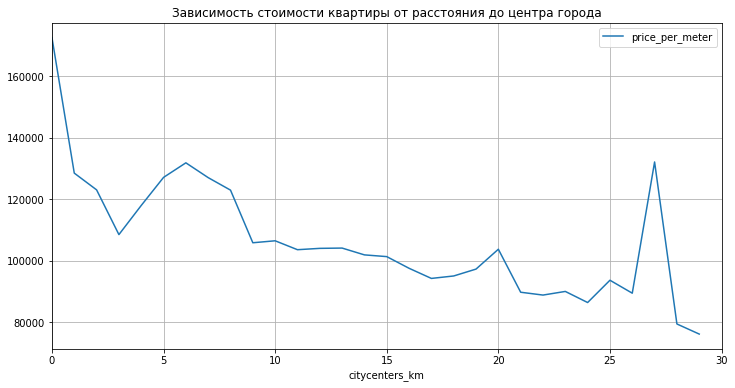

In [2322]:
#Сгруппируем по столбцу citycenters_km и построим график зависимостей этих двух величин
spb_properties_final = spb_properties.pivot_table(index='citycenters_km', values = 'price_per_meter', aggfunc='median')
spb_properties_final.plot(title='Зависимость стоимости квартиры от расстояния до центра города', xlim=(0, 30), grid=True, figsize=(12, 6))

Мы видим, что стоимость квадратного метра резко снижается дальше 8 км. Примем все объекты в пределах радиуса 8 км за центральную часть города.

### Вывод: Все объекты в пределах радиуса 8 км мы приняли за центральную часть города при оценки зависимости стоимости недвижимости от расстояния до центра города на основе картографических данных

### Анализ квартир в центре Санкт_Петербурга и сравнение с  выборкой по всему городу

In [2323]:
#сделаем срез квартир в центре санкт-Петербурга
spbcenter_properties = spb_properties.query('citycenters_km <= 8.0')
spbcenter_properties.describe()[['total_area', 'last_price', 'rooms','ceiling_height']]

,total_area,last_price,rooms,ceiling_height
count,3263.000000,2.763000e+03,3959.000000,2002.000000
mean,68.227196,7.298976e+06,2.584744,2.894840
std,22.566070,2.213906e+06,1.102310,0.211477
min,12.000000,1.600000e+06,0.000000,2.400000
25%,49.950000,5.650000e+06,2.000000,2.732500
50%,67.600000,7.200000e+06,3.000000,3.000000
75%,85.400000,8.990000e+06,3.000000,3.040000
max,114.200000,1.189440e+07,5.000000,3.210000


In [2324]:
#и посмотрим, как выглядят данные выборки по всему городу
spb_properties.describe()[['total_area', 'last_price', 'rooms','ceiling_height']]

,total_area,last_price,rooms,ceiling_height
count,14527.000000,1.369500e+04,15477.000000,9327.000000
mean,56.491576,5.660503e+06,2.114363,2.703022
std,20.348695,2.092518e+06,1.007903,0.194083
min,12.000000,1.219000e+04,0.000000,2.300000
25%,41.000000,4.070000e+06,1.000000,2.550000
50%,52.000000,5.150000e+06,2.000000,2.650000
75%,69.000000,6.850000e+06,3.000000,2.800000
max,114.200000,1.189440e+07,5.000000,3.210000


#### Мы видим, что в среднем в центре СПБ продаются трешки с бОльшим метражом, более высокими потолками и более дорогие по цене

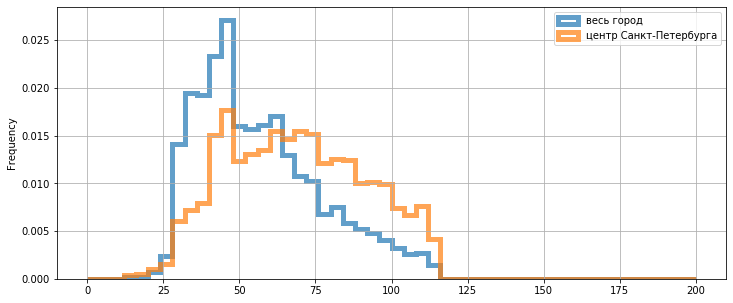

In [2325]:
#выведем гистограммы площади квартир в центре спб и в целом в городе:
ax = spb_properties.plot(kind='hist', y='total_area', histtype='step', range=(0, 200), bins=50, linewidth=5, alpha=0.7, figsize=(12, 5), label='весь город', density=True)
spbcenter_properties.plot(kind='hist', y='total_area', histtype='step', range=(0, 200), bins=50, linewidth=5, alpha=0.7, figsize=(12, 5), label='центр Санкт-Петербурга', ax=ax, grid=True, legend=True, density=True)

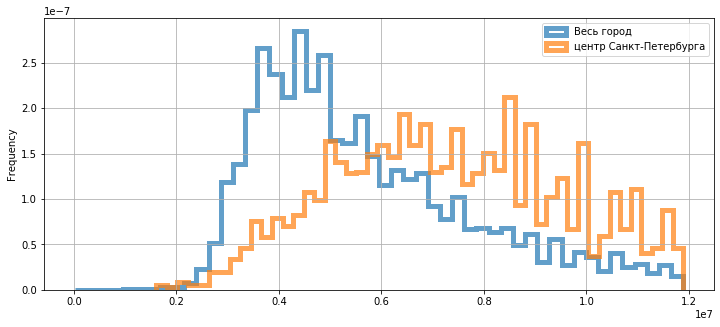

In [2326]:
#выведем гистограммы цен на квартиры в центре спб и в общей выборке:
ax = spb_properties.plot(kind='hist', y='last_price', histtype='step', bins=50, linewidth=5, alpha=0.7, figsize=(12, 5), label='Весь город', density=True)
spbcenter_properties.plot(kind='hist', y='last_price', histtype='step', bins=50, linewidth=5, alpha=0.7, figsize=(12, 5), label='центр Санкт-Петербурга', ax=ax, grid=True, legend=True, density=True)

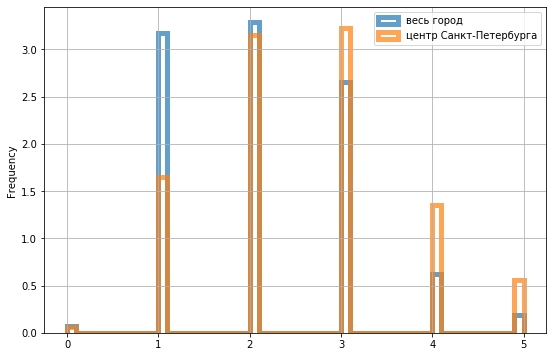

In [2327]:
#Построим гистограммы для числа комнат
ax = spb_properties.plot(kind='hist', y='rooms', histtype='step', bins=50, linewidth=5, alpha=0.7, figsize=(9, 6), label='весь город', density=True)
spbcenter_properties.plot(kind='hist', y='rooms', histtype='step', bins=50, linewidth=5, alpha=0.7, figsize=(9, 6), label='центр Санкт-Петербурга', ax=ax, grid=True, legend=True, density=True)

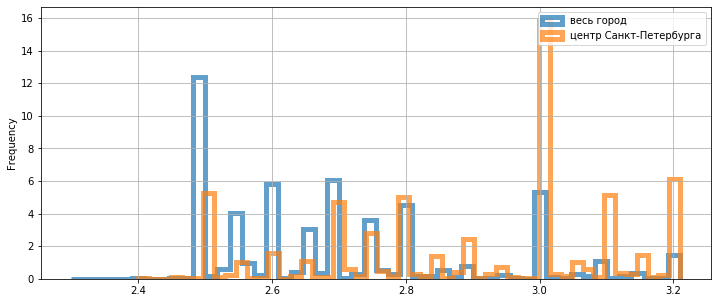

In [2328]:
#И, наконец, гистограммы высоты потолков
ax = spb_properties.plot(kind='hist', y='ceiling_height', histtype='step', bins=50, linewidth=5, alpha=0.7, figsize=(12, 5), label='весь город', density=True)
spbcenter_properties.plot(kind='hist', y='ceiling_height', histtype='step', bins=50, linewidth=5, alpha=0.7, figsize=(12, 5), label='центр Санкт-Петербурга', ax=ax, grid=True, legend=True, density=True)

### Вывод: Мы видим, что в центре в среднем продаются квартиры бОльшей площади(график сдвинут вправо), средняя цена квартиры почти в два раза выше чем в среднем по всей выборке. Квартиры в продаже - преимущественно двушки и трешки. Квартиры в центре с более высокими потолками.

Оценим зависимость стоимости квартиры в центре от следующих параметров: число комнат, этаж, удалённость от центра, дата размещения объявления. И сравним с  выборкой по всему городу

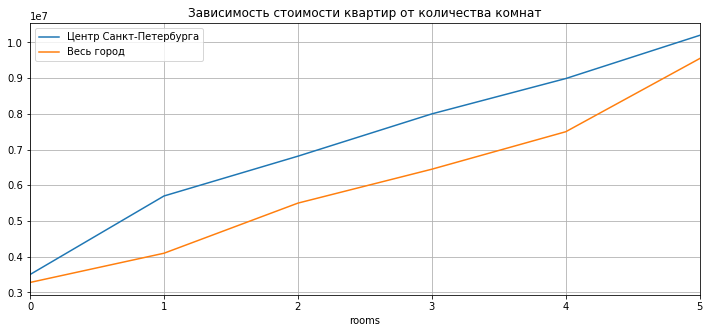

In [2329]:
spbcenter_rooms = spbcenter_properties.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')
spbcenter_rooms.columns = ['Центр Санкт-Петербурга']
spb_properties_rooms = spb_properties.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')
spb_properties_rooms.columns = ['Весь город']
spb_price_rooms = spbcenter_rooms.join(spb_properties_rooms, on='rooms')
spb_price_rooms.plot(title='Зависимость стоимости квартир от количества комнат', figsize=(12, 5), legend=True, grid=True)

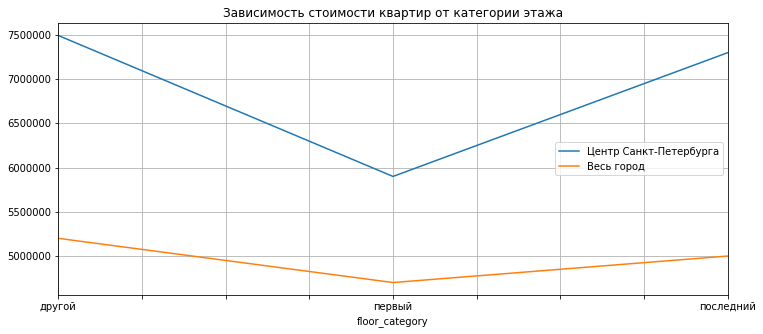

In [2330]:
#Зависимость стоимости квартиры от категории этажа
spbcenter_floor = spbcenter_properties.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = 'median')
spbcenter_floor.columns = ['Центр Санкт-Петербурга']
spb_properties_floor = spb_properties.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = 'median')
spb_properties_floor.columns = ['Весь город']
spb_price_floor = spbcenter_floor.join(spb_properties_floor, on='floor_category')
spb_price_floor.plot(title='Зависимость стоимости квартир от категории этажа', figsize=(12, 5), legend=True, grid=True)

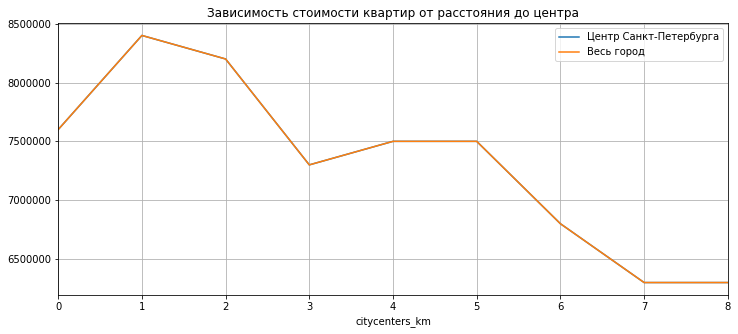

In [2331]:
#Зависимость стоимости квартиры от удаленности от центра
spbcenter_tocenter = spbcenter_properties.pivot_table(index = 'citycenters_km', values = 'last_price', aggfunc = 'median')
spbcenter_tocenter.columns = ['Центр Санкт-Петербурга']
spb_properties_tocenter = spb_properties.pivot_table(index = 'citycenters_km', values = 'last_price', aggfunc = 'median')
spb_properties_tocenter.columns = ['Весь город']
spb_price_tocenter = spbcenter_tocenter.join(spb_properties_tocenter, on='citycenters_km')
spb_price_tocenter.plot(title='Зависимость стоимости квартир от расстояния до центра', figsize=(12, 5), legend=True, grid=True)

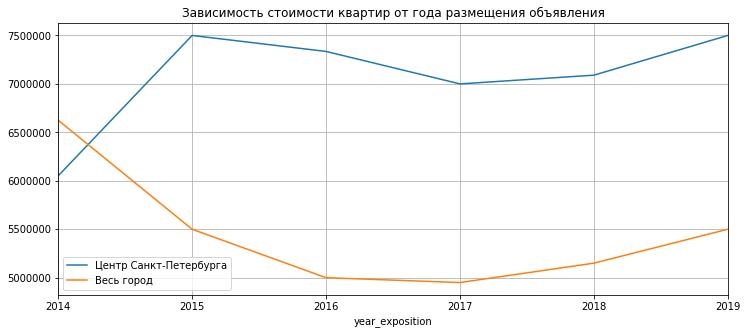

In [2332]:
#зависимость стоимости квартиры от года размещения объявления
spbcenter_year = spbcenter_properties.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = 'median')
spbcenter_year.columns = ['Центр Санкт-Петербурга']
spb_properties_year = spb_properties.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = 'median')
spb_properties_year.columns = ['Весь город']
spb_price_year = spbcenter_year.join(spb_properties_year, on='year_exposition')
spb_price_year.plot(title='Зависимость стоимости квартир от года размещения объявления', figsize=(12, 5), legend=True, grid=True)

ИНтересно, что после кризисного 2014 года стоимость квартир в общей выборке начала снижаться, а квартиры в центре Санкт-Петербурга резко подорожали. Можно предположить, что на эту тенденцию повлиял рост курса доллара, ограниченное предложение квартир в центре и достаточно уверенная платежеспособность клиентов данного сегмента недвижимости. В центре покупают квартиры более обеспеченные люди, для которых рост курса доллара не является столь определяющим, как для людей - клиентов квартир в спальных районах, покупающих квартиры преимущественно в ипотеку. 

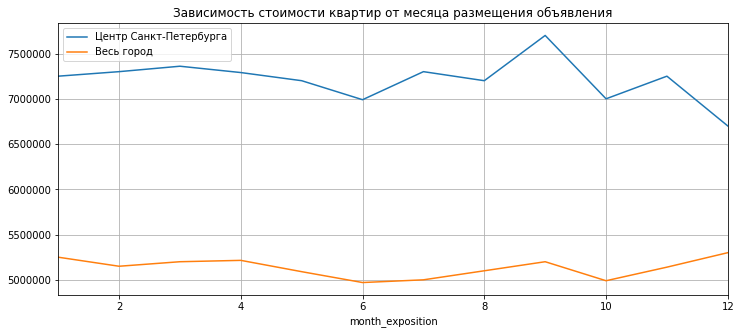

In [2333]:
#зависимость стоимости квартиры от месяца размещения объявления
spbcenter_month = spbcenter_properties.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = 'median')
spbcenter_month.columns = ['Центр Санкт-Петербурга']
spb_properties_month = spb_properties.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = 'median')
spb_properties_month.columns = ['Весь город']
spb_price_month = spbcenter_month.join(spb_properties_month, on='month_exposition')
spb_price_month.plot(title='Зависимость стоимости квартир от месяца размещения объявления', figsize=(12, 5), legend=True, grid=True)

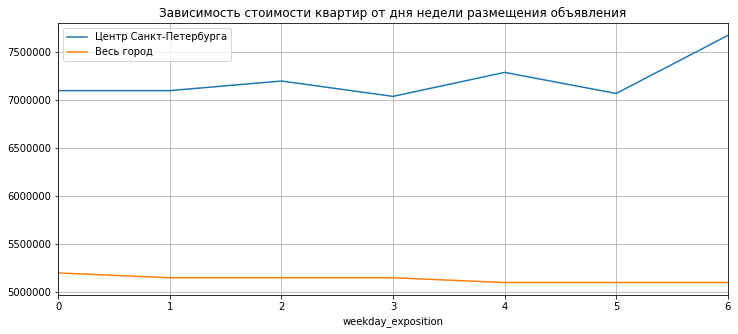

In [2334]:
#зависимость стоимости квартиры от дня недели размещения объявления
spbcenter_weekday = spbcenter_properties.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = 'median')
spbcenter_weekday.columns = ['Центр Санкт-Петербурга']
spb_properties_weekday = spb_properties.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = 'median')
spb_properties_weekday.columns = ['Весь город']
spb_price_weekday = spbcenter_weekday.join(spb_properties_weekday, on='weekday_exposition')
spb_price_weekday.plot(title='Зависимость стоимости квартир от дня недели размещения объявления', figsize=(12, 5), legend=True, grid=True)

### Вывод: Сравнивая зависимость стоимости квартиры от одних и тех же параметров (количества комнат, категории этажа, дате размещения объявлений) в выборке для всего Санкт-Петербурга и в центре города, мы прослеживаем похожие  тенденции: Чем больше число комнат, тем выше стоимость объекта. Однако стоимость квадратного метра недвижимости в однушке на 10% выше чем в трешке.  Квартиры на первом и последнем этажах ценятся ниже, чем в промежуточных этажах. Исключение составляют видовые квартиры-студии и квартиры с открытой планировкой : такие объекты самые дорогие на последних этажах. 

### Шаг 5. Общий вывод

### Исходная выборка очень разнородна, в ней присутствуют много факторов, которые предположительно, влияют на стоимость недвижимости. Мы предварительно обработали наши данные, удалив по возможности пропущенные значения, изменили тип данных, если это было необходимо для решения задачи. Визуализировали данные по нескольким параметрам: стоимость, площадь, количество комнат, высота потолков, длительность продажи: оценили характер распределения, удалили выбросы, использовав диаграмму размаха. Выделили среднестатистическую квартиру в продаже: двушка площадью 50кв.м, с высотой потолков 2.64м, ценой порядка 4.4млн рублей.  Следующим этапом оценили зависимость стоимости объекта недвижимсоти от разных параметров. Реально стоимость объектов жилой недвижимости зависит от базовых факторов: площади, количества комнат, удаленности от центра, высоты потолков, категории этажа. Стоимость недвижимости определяется текущей экономической ситуацией в стране и регионе, а также востребованностью объекта на рынке. Чем дольше висит объявление в продаже, тем больше опускается его финальная цена. Наличие вблизи водоемов, парков и аэропортов можно рассматривать как дополнительный бонус, но не определяющий фактор при покупке недвижимости. Мы выделили центр Санкт-Петербурга: он определяется радиусом - 8 км. Квартиры в пределах центра в два раза дороже аналогичных в спальных районах. В центре меньше однокомнатных квартир, продают в основном двушки и трешки. Поэтому и средний метраж продаваемых объектов больше. В центре, где преобладает старый фонд квартиры продаются с более высокими потолками. В пределах центра зависимость от расстояния до центра практически не прослеживается. В остальном объекта центр СПб  обладают схожим характером зависимости от выбранных параметров.